In [1]:
# Importando as bibliotecas necessárias

import pandas as pd
import random
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Fazendo os ajustes necessários para gerar e salvar os gráficos

dpi = 96
plt.rcParams['figure.figsize'] = (1280/dpi, 720/dpi) # Baseado no tamanho do gráfico, em pixels, que desejo gerar
plt.rcParams['figure.dpi'] = dpi
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
# Gerando a base de dados aleatória

periodos = [date(2021, 1, 1) + relativedelta(months = +x) for x in range(0, 24, 3)]
linhas = 50
nps = pd.DataFrame()
nps_data_trans = []
nps_nota_trans = []

for i in range(len(periodos)-1):
    
    data_ini = periodos[i]
    data_fim = periodos[i+1]
    total_days = (data_fim - data_ini).days
    
    for linha in range(linhas):
        randay = random.randrange(total_days)
        nps_data_trans.append(data_ini + timedelta(days = randay))
        nps_nota_trans.append(random.randint(0, 10))
        
    nps['data_{:%m/%Y} - {:%m/%Y}'.format(data_ini, data_fim)] = nps_data_trans
    nps['nps_{:%m/%Y} - {:%m/%Y}'.format(data_ini, data_fim)] = nps_nota_trans
    nps_data_trans = []
    nps_nota_trans = []

nps.insert(0, 'id_cliente', nps.index.values + 1)
nps

,id_cliente,data_01/2021 - 04/2021,nps_01/2021 - 04/2021,data_04/2021 - 07/2021,nps_04/2021 - 07/2021,data_07/2021 - 10/2021,nps_07/2021 - 10/2021,data_10/2021 - 01/2022,nps_10/2021 - 01/2022,data_01/2022 - 04/2022,nps_01/2022 - 04/2022,data_04/2022 - 07/2022,nps_04/2022 - 07/2022,data_07/2022 - 10/2022,nps_07/2022 - 10/2022
0,1,2021-03-28,10,2021-06-25,5,2021-09-30,5,2021-10-10,10,2022-01-11,5,2022-04-26,3,2022-08-31,5
1,2,2021-02-26,3,2021-06-28,3,2021-09-27,3,2021-12-20,7,2022-03-07,3,2022-05-23,6,2022-07-10,2
2,3,2021-02-13,7,2021-06-24,4,2021-07-03,1,2021-11-13,9,2022-02-08,8,2022-04-29,2,2022-07-18,2
3,4,2021-03-23,0,2021-05-28,8,2021-08-13,2,2021-10-27,9,2022-01-06,6,2022-05-22,0,2022-08-20,9
4,5,2021-03-04,7,2021-04-30,7,2021-09-30,3,2021-10-09,1,2022-01-06,0,2022-04-07,10,2022-08-10,7
5,6,2021-02-08,8,2021-04-02,2,2021-09-17,3,2021-12-18,0,2022-01-04,6,2022-05-24,10,2022-08-07,9
6,7,2021-01-30,3,2021-06-07,0,2021-07-04,8,2021-11-08,0,2022-02-03,0,2022-05-01,9,2022-07-04,10
7,8,2021-01-31,5,2021-05-17,1,2021-08-10,6,2021-10-14,1,2022-02-03,8,2022-05-08,8,2022-08-10,2
8,9,2021-03-07,3,2021-04-05,9,2021-08-18,10,2021-11-10,3,2022-01-07,2,2022-04-03,0,2022-09-23,8
9,10,2021-03-16,10,2021-06-11,9,2021-09-17,2,2021-10-29,3,2022-01-08,9,2022-05-18,10,2022-09-05,9


In [3]:
# Transpondo a base de dados do nps

nps_transposto = pd.wide_to_long(nps, ['data', 'nps'], i = 'id_cliente', j = 'periodo', 
                                 sep = '_', suffix = '(.)+').reset_index()
nps_transposto.data = pd.to_datetime(nps_transposto.data)
nps_transposto

,id_cliente,periodo,data,nps
0,1,01/2021 - 04/2021,2021-03-28,10
1,2,01/2021 - 04/2021,2021-02-26,3
2,3,01/2021 - 04/2021,2021-02-13,7
3,4,01/2021 - 04/2021,2021-03-23,0
4,5,01/2021 - 04/2021,2021-03-04,7
...,...,...,...,...
345,46,07/2022 - 10/2022,2022-07-07,4
346,47,07/2022 - 10/2022,2022-09-16,8
347,48,07/2022 - 10/2022,2022-07-13,3
348,49,07/2022 - 10/2022,2022-08-17,0


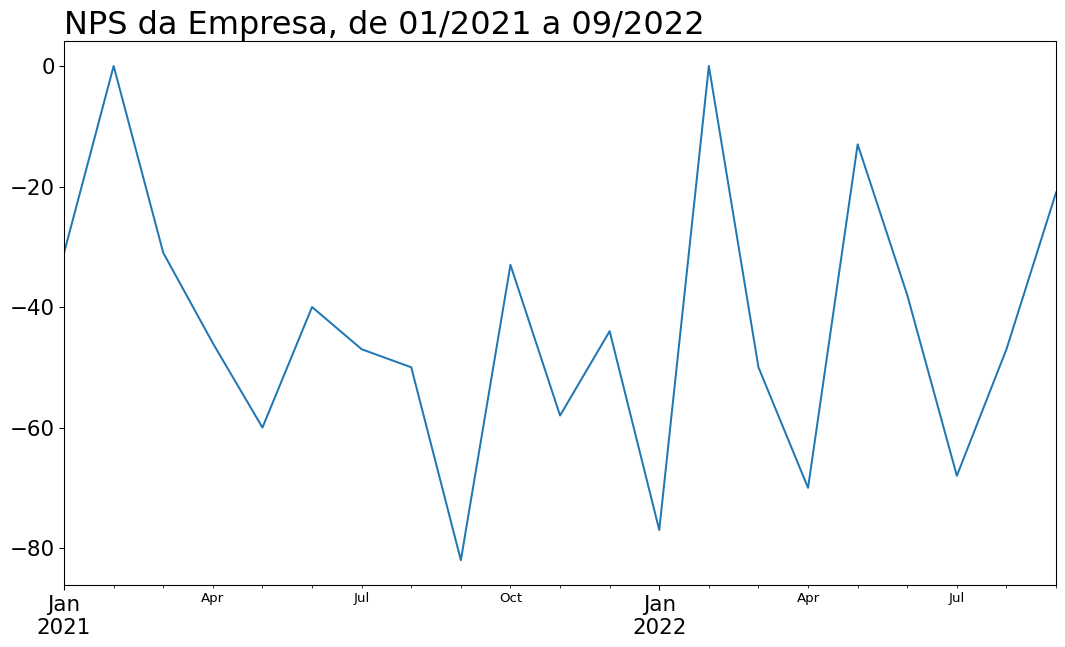

In [4]:
# Calculando o NPS da empresa e plotando um gráfico com as notas por mês

calculo_nps = pd.DataFrame(index = pd.date_range('1/1/2021', periods = 21, freq = 'MS'), 
                           columns = ['promotores', 'neutros', 'detratores', 'nps_empresa'])

for i in calculo_nps.index:
    
    nps_filtro_data = nps_transposto[(nps_transposto.data >= i) & 
                                     (nps_transposto.data < (i + relativedelta(months = +1)))]
    
    calculo_nps.loc[i, 'promotores'] = nps_filtro_data[(nps_filtro_data.nps > 8)].id_cliente.count()
    
    calculo_nps.loc[i, 'neutros'] = nps_filtro_data[(nps_filtro_data.nps > 6) &
                                                    (nps_filtro_data.nps < 9)].id_cliente.count()
    
    calculo_nps.loc[i, 'detratores'] = nps_filtro_data[(nps_filtro_data.nps < 7)].id_cliente.count()

    calculo_nps.loc[i, 'nps_empresa'] = int(100 * (calculo_nps.loc[i, 'promotores'] - 
                                                   calculo_nps.loc[i, 'detratores']) / \
                                            calculo_nps.loc[i].sum())

calculo_nps.nps_empresa.plot()
plt.title('NPS da Empresa, de {:%m/%Y} a {:%m/%Y}'.format(calculo_nps.index.min(), 
                                                          calculo_nps.index.max()), 
          size = 24, loc = 'left')
plt.xticks(size = 16)
plt.yticks(size = 16)
plt.show()
plt.close()